In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv('train.csv')

In [4]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Cleaning 

In [6]:
dataset.isnull().sum().sum()

6965

In [7]:
dataset.drop(columns=['Id'],inplace=True)
dataset.drop(columns=['PoolQC'],inplace=True)

In [8]:
dataset['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [9]:
dataset['BsmtExposure'].replace('No', 'No_Exposure', inplace=True)

In [10]:
l = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2','GarageCond','GarageQual','BsmtExposure', 'GarageFinish','Alley','Fence','MiscFeature','FireplaceQu','GarageType']
for i in l:
    a = 'NO_' + i
    dataset[i].fillna(a, inplace=True)

In [11]:
dataset['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [12]:
m=dataset['MasVnrArea'].mean()
dataset['MasVnrArea'].fillna(value=m,inplace=True)

In [13]:
dataset['GarageType'].fillna(value='NO_Garage',inplace=True)

In [14]:
m=dataset['GarageYrBlt'].mean()
dataset['GarageYrBlt'].fillna(value=m,inplace=True)

In [15]:
dataset['LotFrontage'].fillna(value=0,inplace=True)

In [16]:
dataset.dropna(subset=['MasVnrType'],inplace=True)

In [17]:
dataset.dropna(subset=['Electrical'], inplace=True)

In [18]:
dataset.isnull().sum().sum()

0

In [19]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le=LabelEncoder()
col= dataset.select_dtypes(include='object').columns
for i in col:
    if dataset[i].dtype=='object':
        dataset[i]=le.fit_transform(dataset[i])


### Data visualization

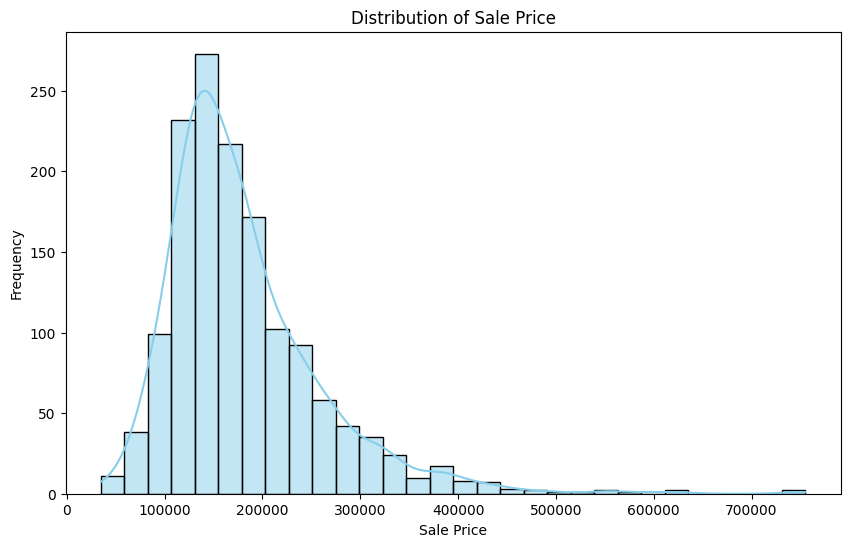

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['SalePrice'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')
plt.show()

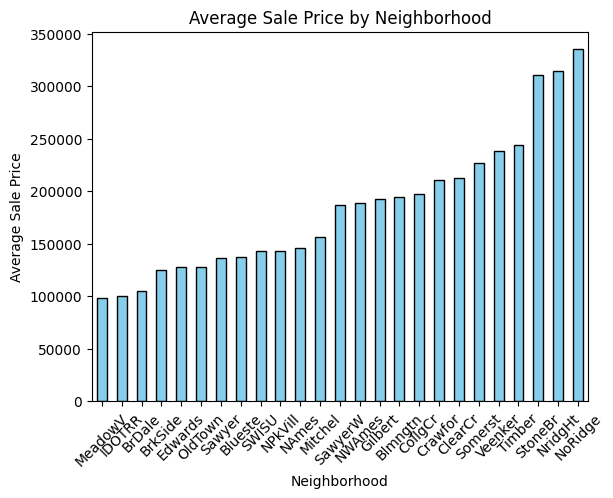

In [21]:
avg_price_neighborhood = dataset.groupby('Neighborhood')['SalePrice'].mean().sort_values()
avg_price_neighborhood.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Neighborhood')
plt.xticks(rotation=45)
plt.show()

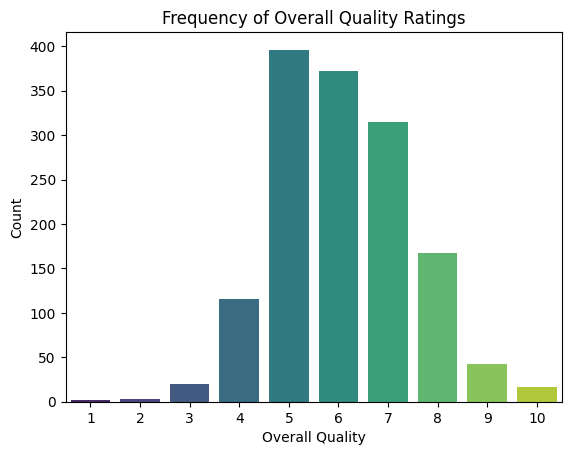

In [22]:
sns.countplot(x='OverallQual', data=dataset, palette='viridis')
plt.xlabel('Overall Quality')
plt.ylabel('Count')
plt.title('Frequency of Overall Quality Ratings')
plt.show()

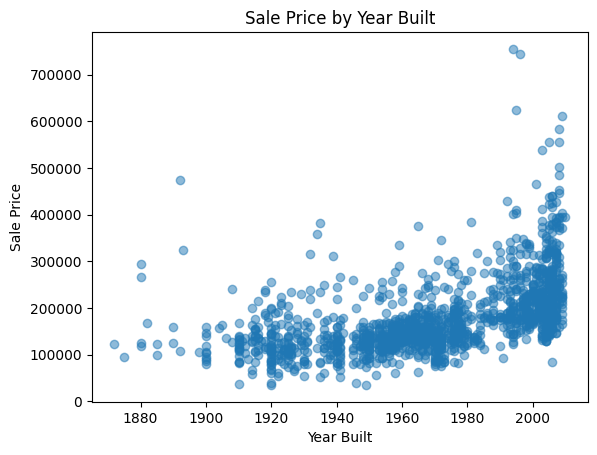

In [23]:
plt.scatter(dataset['YearBuilt'], dataset['SalePrice'], alpha=0.5)
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Sale Price by Year Built')
plt.show()

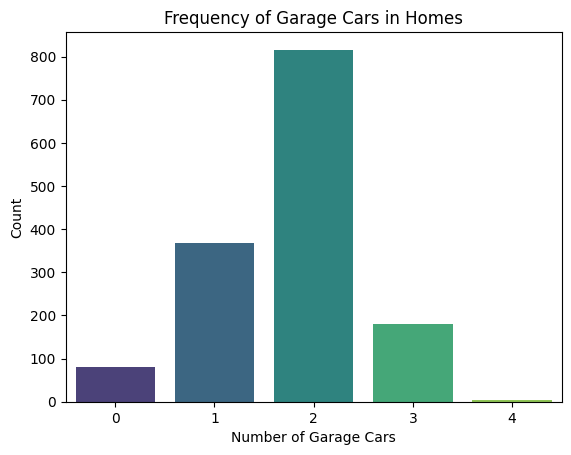

In [24]:
sns.countplot(x='GarageCars', data=dataset, palette='viridis')
plt.xlabel('Number of Garage Cars')
plt.ylabel('Count')
plt.title('Frequency of Garage Cars in Homes')
plt.show()

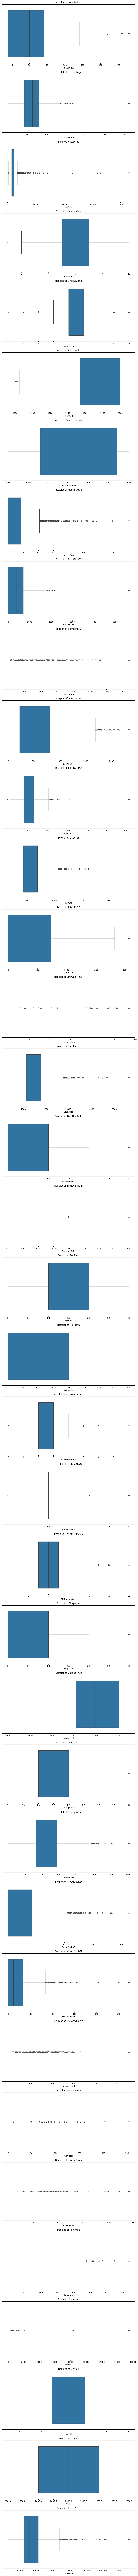

In [24]:
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns


num_plots = len(numeric_cols)


fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, num_plots * 5))

# Iterate through numeric columns and plot boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=dataset[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:
plt.figure(figsize=(100,100))
sns.heatmap(dataset.corr(),annot=True)
#plt.savefig('new.jpg')
plt.show()

### Spliting the Data

In [25]:
x=dataset.iloc[:,:-1]
y=dataset['SalePrice']

In [26]:
from sklearn.model_selection import train_test_split 

In [27]:
from sklearn.linear_model import LinearRegression

In [23]:
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    print(lr.score(x_test,y_test)*100 ,lr.score(x_train,y_train)*100,i)
    

86.47330229791923 84.10483134384816 0
79.88152984394141 85.10822246085813 1
87.38288925893183 83.74364321466949 2
76.93473000432358 86.04087189474987 3
64.91325276783641 88.12859146140312 4
85.81455070823033 84.11729837300938 5
86.52002812452464 84.12626232846658 6
64.03752598381196 87.53427767857502 7
87.12935274209269 83.87421940931887 8
87.07765000619102 83.8741742268535 9
59.07539058827744 87.8488627766987 10
87.84385099979836 83.91047427725411 11
79.76638561893378 85.45345544816179 12
59.9824205327973 88.06164644369268 13
81.5551739682284 84.83254725352835 14
85.30287077270754 84.38723323930544 15
87.89394612196676 83.66421369210117 16
76.08971566360276 86.03341719620015 17
85.98345973775426 84.12106516206612 18
84.05144832356197 84.49950472488524 19
87.82751199023474 83.59111917765183 20
85.13300986315964 84.17248607344823 21
78.26352253277004 85.8415813162837 22
64.76659011762702 88.708530157837 23
63.9408005662218 87.9883611433164 24
88.89042462551889 83.68109835418468 25
51.33

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=25)

### Model Taining

#### Linear Regression

In [25]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [26]:
print(lr.score(x_test,y_test)*100 ,lr.score(x_train,y_train)*100)

88.89042462551889 83.68109835418468


#### Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
dt=DecisionTreeRegressor(max_depth=10,criterion='absolute_error',splitter='best')
dt.fit(x_train,y_train)
dt.score(x_test,y_test)*100 ,dt.score(x_train,y_train)*100

(72.49705083863368, 97.46803434539068)

In [36]:
# (77.23414771776245, 99.94543820951287)
#(79.8309960906415, 99.81163848432743)
#(68.42982568958558, 99.73093260761057)

In [30]:
from sklearn.tree import plot_tree

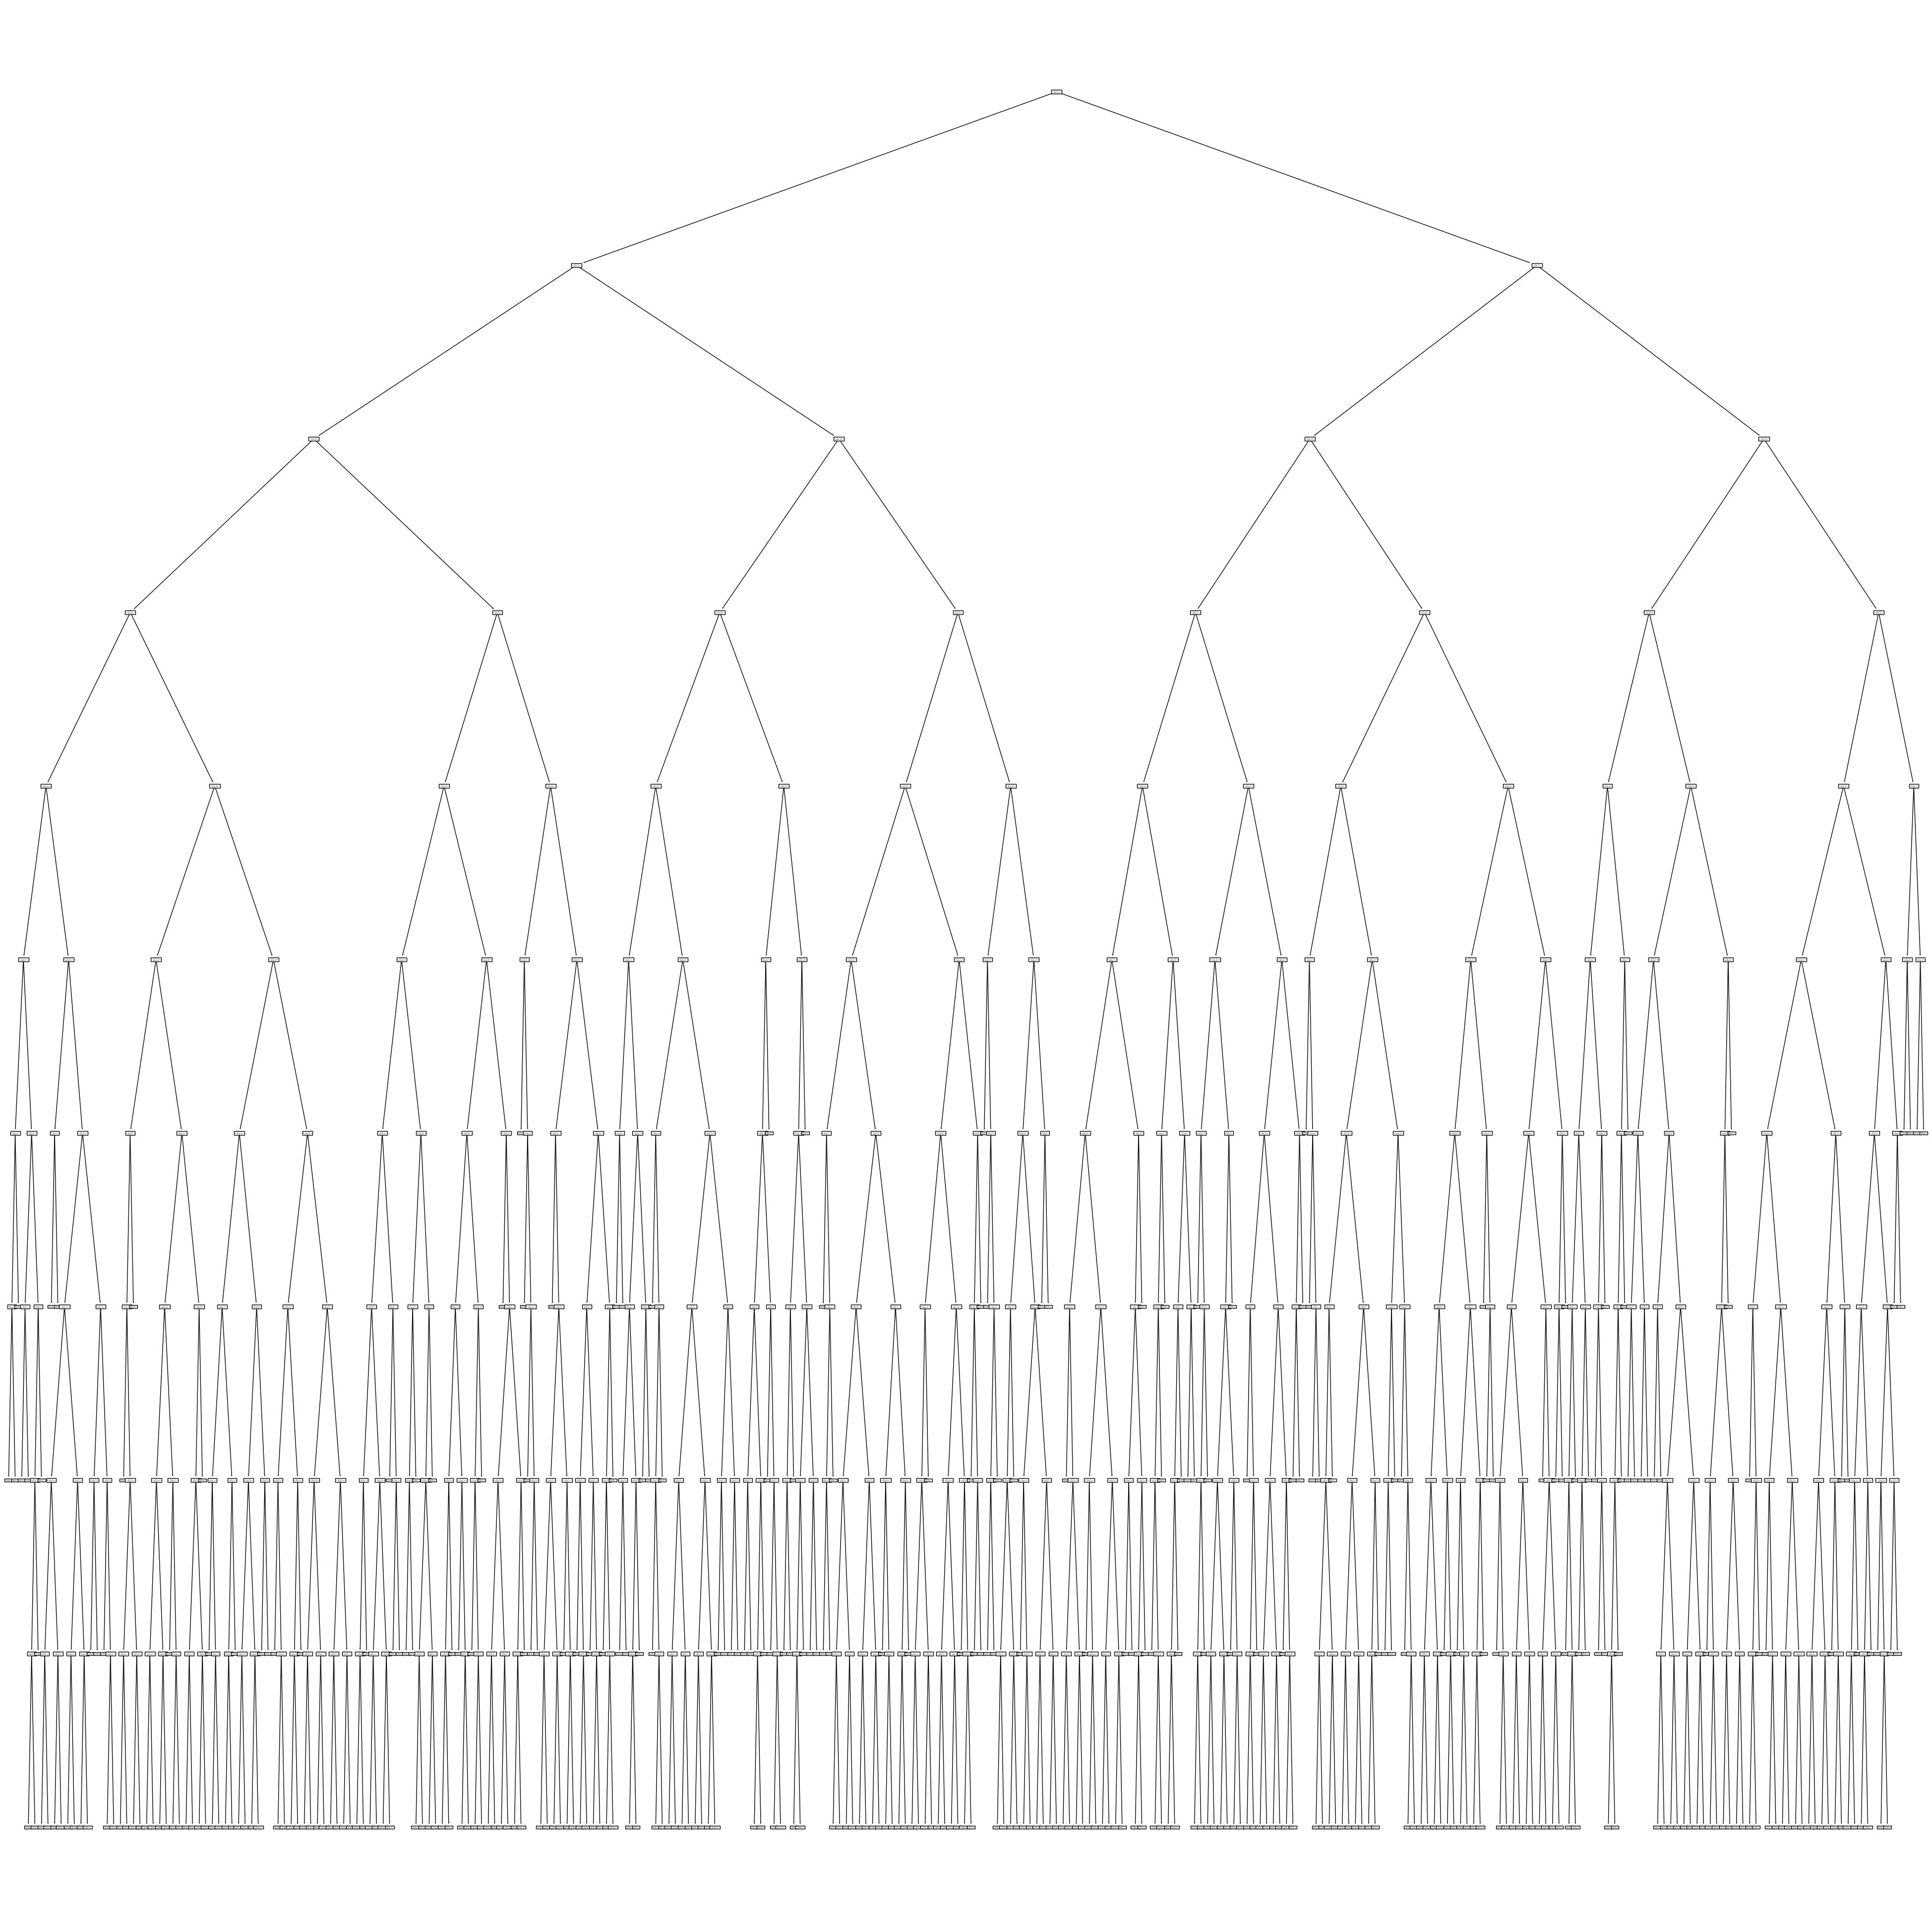

In [42]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig('demo.jpg')
plt.show()

#### RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf=RandomForestRegressor(n_estimators=30)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)*100,rf.score(x_train,y_train)*100

(89.31331844344814, 97.82422679590651)

### finding the best parameters

In [29]:
from sklearn.model_selection import GridSearchCV

In [31]:
df1={'criterion':["squared_error","friedman_mse", "poisson", "absolute_error"],  # 
    'splitter':["best", "random"],
    'max_depth':[i for i in range(2,20)]}

In [44]:
gs=GridSearchCV(DecisionTreeRegressor(),param_grid=df1)
gs.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [45]:
gs.best_params_

{'criterion': 'absolute_error', 'max_depth': 6, 'splitter': 'best'}

In [46]:
gs.score(x_test,y_test)*100 ,gs.score(x_train,y_train)*100

(77.62778638010373, 87.6331897154222)

In [34]:
df2 = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"],
    'n_estimators':[100]
      }

In [47]:
gs2=GridSearchCV(RandomForestRegressor(),param_grid=df2)
gs2.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'n_estimators': [100]})

In [48]:
gs2.score(x_test,y_test)*100,gs2.score(x_train,y_train)*100

(90.083546996203, 97.90819580716888)

In [49]:
gs2.best_params_

{'criterion': 'absolute_error', 'n_estimators': 100}

### Using the best paramaters in Voting Regressor

In [35]:
from sklearn.ensemble import VotingRegressor

In [36]:
li=[('lr',LinearRegression()),('rf',RandomForestRegressor(criterion='absolute_error', n_estimators=100))]

In [37]:
vr=VotingRegressor(li,n_jobs=50)
vr.fit(x_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(criterion='absolute_error'))],
                n_jobs=50)

In [42]:
vr.score(x_test,y_test)*100,vr.score(x_train,y_train)*100

(92.05456381904091, 93.17519744717606)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = vr.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 15010.202119001191
Mean Squared Error (MSE): 417364736.750932
Root Mean Squared Error (RMSE): 20429.506522452568
R-squared (R²): 0.920545638190409
